In [4]:
from sklearn.cluster import DBSCAN
import pandas as pd

In [5]:
df = pd.read_csv('../10/dogs.csv')
df.head()

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8


In [6]:
feature_names = df.columns[1:]
X = df[feature_names]
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=feature_names)
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [2]:
model = DBSCAN(eps=0.1, min_samples=2)

In [9]:
model.fit(X)

,eps,0.1
,min_samples,2
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [10]:
model.labels_

array([ 0, -1, -1, -1,  1,  2,  2, -1,  0, -1,  1])

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

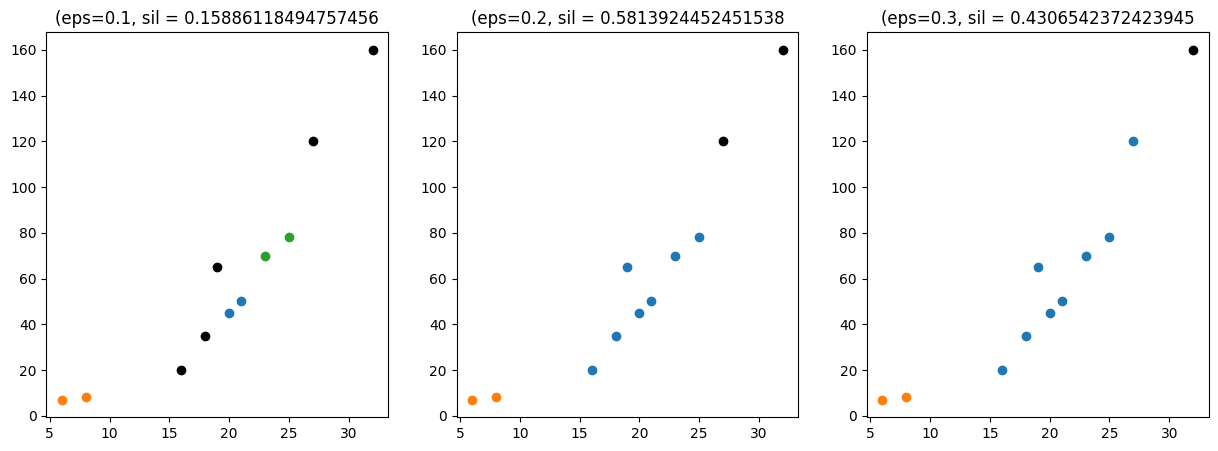

In [13]:
eps_values = [0.1, 0.2, 0.3]
min_samples = 2
fig = plt.figure(figsize=(15,5))
for idx,eps in enumerate(eps_values):
    model = DBSCAN(eps = eps, min_samples=min_samples)
    model.fit(X)

    fig.add_subplot(1, len(eps_values), idx+1)

    k = max(model.labels_) + 1
    for cluster_label in range(-1, k):
        cluster = df[model.labels_ == cluster_label]
        if cluster_label == -1:
            plt.scatter(cluster['height'], cluster['weight'], label = f'cluster {cluster_label}', color = 'black')
        else:
            plt.scatter(cluster['height'], cluster['weight'], label = f'cluster {cluster_label}')
    plt.title(f'(eps={eps}, sil = {silhouette_score(X, model.labels_)}')
plt.show()